## Extracción y visualización de datos de grids.csv

A continuación extraemos los datos del archivo grids.csv y los visualizamos en formato tabular. 

Cada fila representa una imagen. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('circles.csv', header=None)

# Mostrar las primeras filas para visualizar la estructura
print(f"Forma del dataframe: {df.shape}")
print("\nPrimeras 5 filas del archivo grids.csv:")
df.head()

Forma del dataframe: (30, 65)

Primeras 5 filas del archivo grids.csv:


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,1,1,1,0,0,0,0,1,...,0,0,1,1,1,1,1,0,0,0
1,0,0,1,1,1,1,0,0,1,1,...,0,0,0,1,1,1,1,0,0,0
2,0,0,0,1,1,1,1,0,0,1,...,1,0,0,1,1,1,1,0,0,0
3,0,0,1,1,1,1,0,0,0,1,...,0,0,1,1,1,1,1,0,0,0
4,0,0,0,1,1,1,0,0,0,1,...,1,0,0,1,1,1,1,1,0,0


In [8]:
# Realizar un análisis básico de los datos
print(f"Número total de filas (grids): {len(df)}")
print(f"Número total de columnas: {len(df.columns)}")
print(f"Valores únicos en el dataset: {sorted(df.values.flatten().tolist()[:5])}...")

# Estadísticas básicas
df.describe()

Número total de filas (grids): 30
Número total de columnas: 65
Valores únicos en el dataset: [0, 1, 1, 1, 1]...


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,...,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,0.0,0.033333,0.366667,0.633333,0.600000,0.400000,0.066667,0.0,0.066667,0.566667,...,0.333333,0.0,0.266667,0.833333,0.866667,0.866667,0.866667,0.300000,0.0,0.0
std,0.0,0.182574,0.490133,0.490133,0.498273,0.498273,0.253708,0.0,0.253708,0.504007,...,0.479463,0.0,0.449776,0.379049,0.345746,0.345746,0.345746,0.466092,0.0,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0
50%,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0
75%,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,...,1.000000,0.0,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


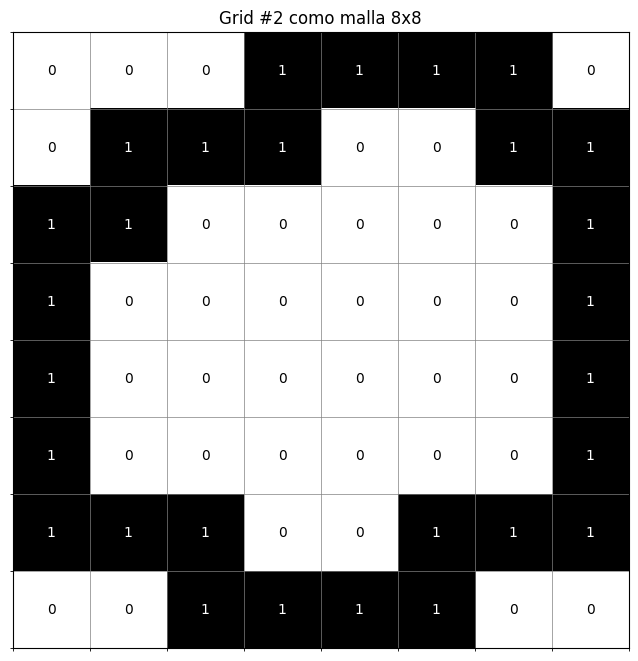

In [9]:
# Visualización del grid como una malla de 8x8
def visualize_grid_8x8(grid_index):
    # Obtener los valores de la fila seleccionada
    grid_values = df.iloc[grid_index].values
    
    # Convertir la fila en una matriz de 8x8
    # Aseguramos que haya 64 valores (si hay menos, rellenamos con ceros)
    if len(grid_values) < 64:
        grid_values = np.pad(grid_values, (0, 64 - len(grid_values)), 'constant')
    # Si hay más de 64 valores, usamos solo los primeros 64
    elif len(grid_values) > 64:
        grid_values = grid_values[:64]
    
    # Reshape a 8x8
    grid_8x8 = grid_values.reshape(8, 8)
    
    # Crear la visualización
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(grid_8x8, cmap='binary', interpolation='none')
    ax.set_title(f'Grid #{grid_index} como malla 8x8')
    
    # Eliminar la leyenda (colorbar)
    # (No se incluye plt.colorbar())
    
    # Ajustar ticks para que las líneas pasen por los 0.5
    ax.set_xticks(np.arange(-0.5, 8, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 8, 1), minor=True)
    
    # Ocultar los ticks principales
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Agregar líneas de cuadrícula en las posiciones .5
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
    
    # Agregar etiquetas para las coordenadas
    for i in range(8):
        for j in range(8):
            color = 'black' if grid_8x8[i, j] == 0 else 'white'
            ax.text(j, i, f'{grid_8x8[i, j]:.0f}', ha='center', va='center', color=color)
    
    plt.show()

# Visualizar el primer grid como una malla 8x8
if len(df) > 0:
    visualize_grid_8x8(2)

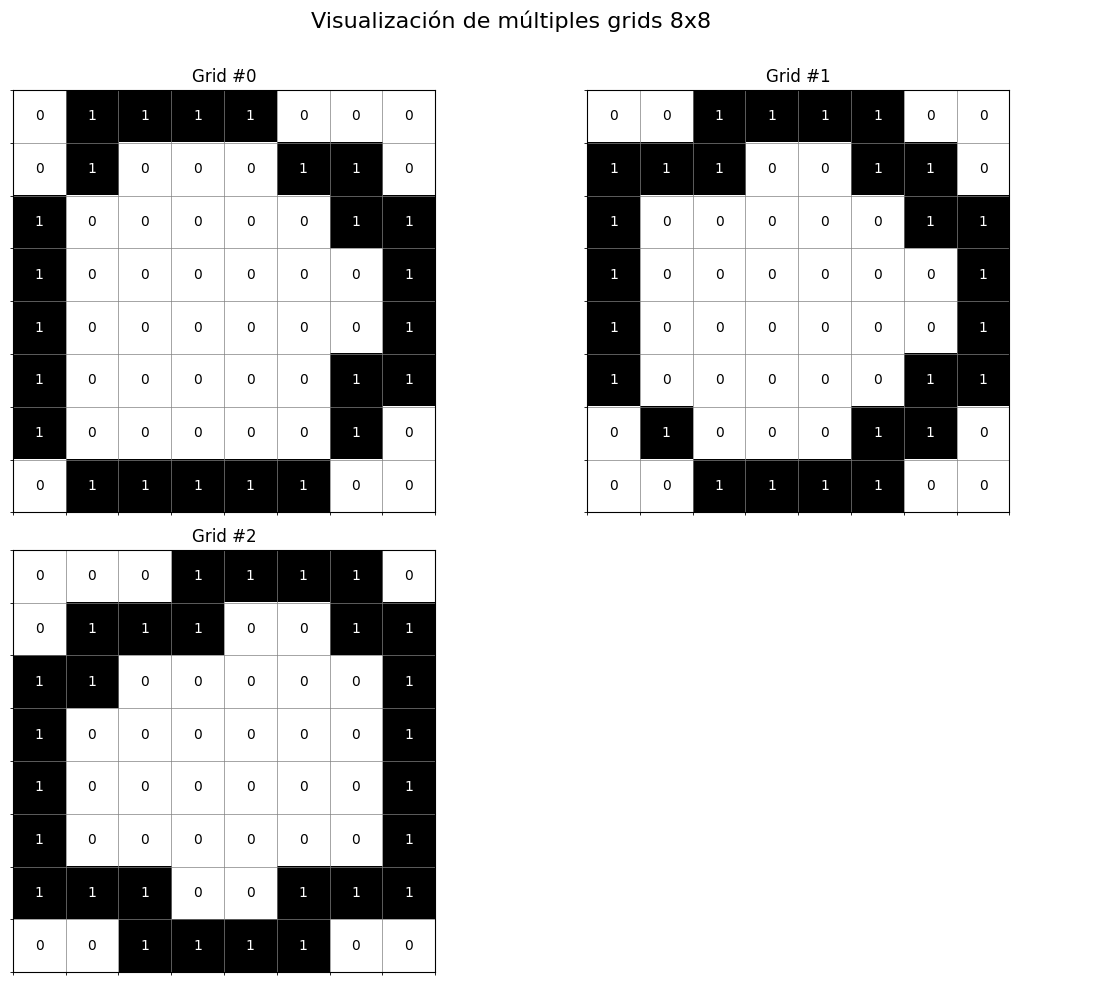

In [10]:
# Visualizar múltiples grids en una figura
def visualize_multiple_grids(start_index, num_grids=4):
    # Determinar filas y columnas para el subplot
    cols = min(2, num_grids)
    rows = (num_grids + 1) // 2
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
    axes = axes.flatten() if num_grids > 1 else [axes]
    
    for i in range(num_grids):
        if start_index + i < len(df):
            # Obtener los valores de la fila seleccionada
            grid_values = df.iloc[start_index + i].values
            
            # Ajustar a 64 valores si es necesario
            if len(grid_values) < 64:
                grid_values = np.pad(grid_values, (0, 64 - len(grid_values)), 'constant')
            elif len(grid_values) > 64:
                grid_values = grid_values[:64]
            
            # Reshape a 8x8
            grid_8x8 = grid_values.reshape(8, 8)
            
            # Configurar el subplot
            ax = axes[i]
            ax.imshow(grid_8x8, cmap='binary', interpolation='none')
            ax.set_title(f'Grid #{start_index + i}')
            
            # Ajustar ticks para que las líneas pasen por los 0.5
            ax.set_xticks(np.arange(-0.5, 8, 1), minor=True)
            ax.set_yticks(np.arange(-0.5, 8, 1), minor=True)
            
            # Ocultar los ticks principales
            ax.set_xticks([])
            ax.set_yticks([])
            
            # Agregar líneas de cuadrícula en las posiciones .5
            ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
            
            # Añadir los valores en cada celda
            for r in range(8):
                for c in range(8):
                    color = 'black' if grid_8x8[r, c] == 0 else 'white'
                    ax.text(c, r, f'{grid_8x8[r, c]:.0f}', ha='center', va='center', color=color)
    
    # Ocultar ejes vacíos si hay menos grids que espacios
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Visualización de múltiples grids 8x8', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

# Visualizar los primeros 4 grids
if len(df) >= 4:
    visualize_multiple_grids(0, 3)